In [2]:
#How often did the company increase (or decrease) in price on a given day?

#To analyze this we need intraday data

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
#Fetching intraday data and filtering to a specific day
data = yf.download(tickers='MSFT', period='5d', interval='15m')
df = pd.DataFrame(data)
df = df.loc[df.index.date == pd.to_datetime('2023-12-19').date()]
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-12-19 09:30:00,371.489990,372.940002,371.160004,371.980011,371.980011,2844151
2023-12-19 09:45:00,372.000000,372.220001,370.649994,370.934998,370.934998,1017234
2023-12-19 10:00:00,370.915009,371.420013,369.839996,371.278503,371.278503,1064075
2023-12-19 10:15:00,371.279999,371.670013,370.880005,371.290009,371.290009,637259
2023-12-19 10:30:00,371.359985,372.329987,371.234985,371.775299,371.775299,788699
2023-12-19 10:45:00,371.774902,372.019989,371.424988,371.660004,371.660004,404062
2023-12-19 11:00:00,371.660004,372.170013,371.359985,372.103302,372.103302,414379
2023-12-19 11:15:00,372.109985,372.640015,371.940002,372.329987,372.329987,424861
2023-12-19 11:30:00,372.329987,372.720001,372.130005,372.579987,372.579987,373472


In [5]:
#Calculating the change between high and low values
df['price_change'] = df['Open'] - df['Close']

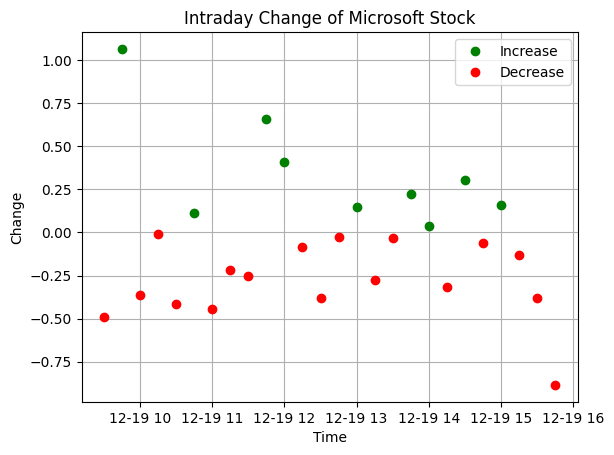

In [6]:
# Plotting positive changes (increase in high-low spread)
plt.plot(df[df['price_change'] > 0].index, df[df['price_change'] > 0]['price_change'], 'go', label='Increase')

# Plotting negative changes (decrease in high-low spread)
plt.plot(df[df['price_change'] < 0].index, df[df['price_change'] < 0]['price_change'], 'ro', label='Decrease')

# Customize the plot
plt.title('Intraday Change of Microsoft Stock')
plt.xlabel('Time')
plt.ylabel('Change')
plt.legend()
plt.grid(True)
plt.show()

What is the general trend of average monthly closing prices over the year?

In [7]:
df_Msft = pd.read_csv('Microsoft_Data.csv')
df_Msft['Date'] = pd.to_datetime(df_Msft['Date'])
df_Msft.set_index('Date', inplace=True)
df_Msft

,Open,High,Low,Close,Volume
Date,,,,,
2013-12-05,32.713887,32.739151,31.307654,31.998140,116305000
2013-12-06,32.351814,32.461282,31.989732,32.301292,36457300
2013-12-09,32.469690,32.730726,32.309698,32.595997,30286000
2013-12-10,32.511795,32.755992,32.014982,32.090767,37828600
2013-12-11,32.048663,32.250755,31.484483,31.669737,39853400
...,...,...,...,...,...
2023-11-29,383.760010,384.299988,377.440002,378.850006,28963400
2023-11-30,378.489990,380.089996,375.470001,378.910004,30554400
2023-12-01,376.760010,378.160004,371.309998,374.510010,33020400


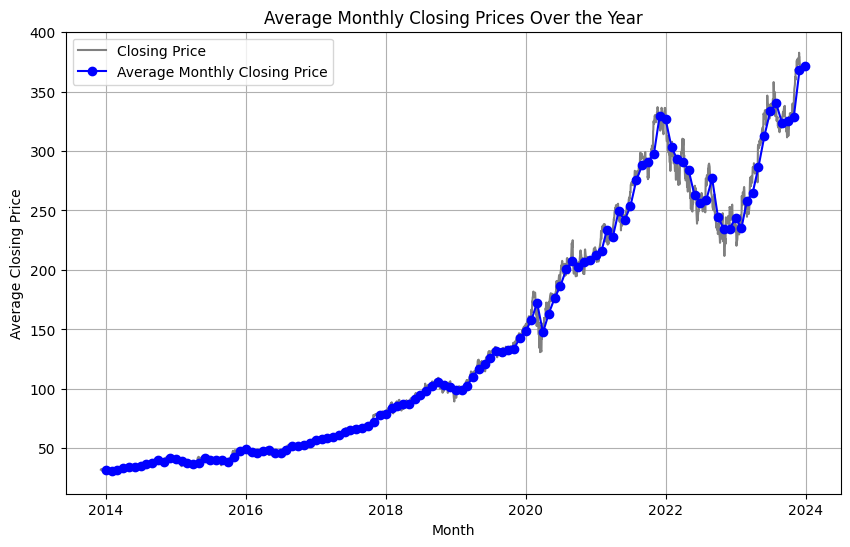

In [8]:
# Resample to calculate average monthly closing prices
monthly_avg = df_Msft['Close'].resample('M').mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_Msft.index, df_Msft['Close'], label='Closing Price', color='grey')
plt.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', color='b', label='Average Monthly Closing Price')

# Customize the plot
plt.title('Average Monthly Closing Prices Over the Year')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.legend()
plt.grid(True)
plt.show()

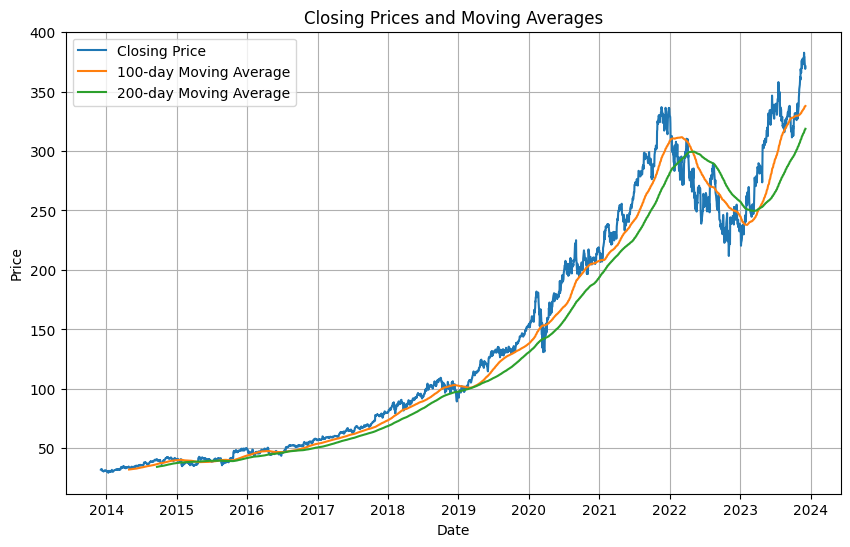

In [9]:
# Calculate 100-day and 200-day moving averages
df_Msft['100_days_avg'] = df_Msft['Close'].rolling(window=100).mean()
df_Msft['200_days_avg'] = df_Msft['Close'].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_Msft.index, df_Msft['Close'], label='Closing Price')
plt.plot(df_Msft.index, df_Msft['100_days_avg'], label='100-day Moving Average')
plt.plot(df_Msft.index, df_Msft['200_days_avg'], label='200-day Moving Average')

# Customize the plot
plt.title('Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Date
1     3.688555e+07
2     3.423037e+07
3     3.608519e+07
4     3.244550e+07
5     2.771866e+07
6     2.942893e+07
7     2.871422e+07
8     2.438970e+07
9     2.830163e+07
10    3.066263e+07
11    2.734696e+07
12    2.950415e+07
Name: Volume, dtype: float64


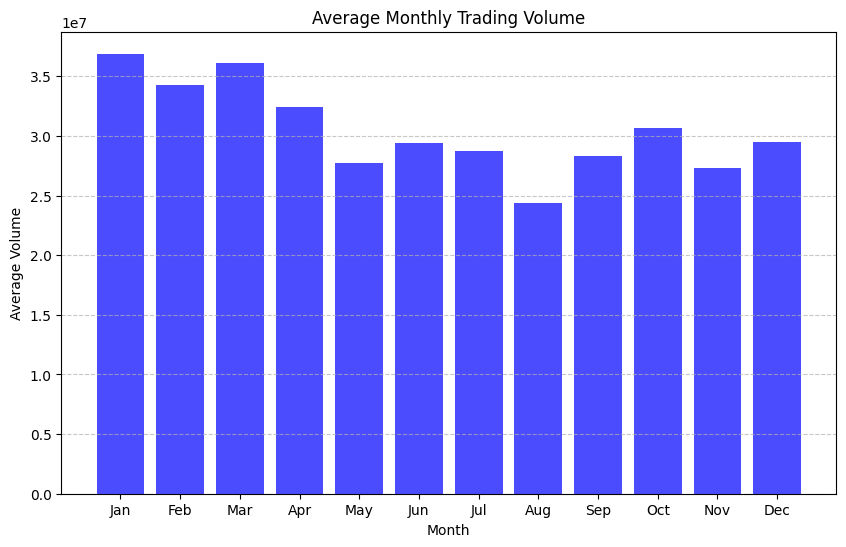

In [10]:
#Are there any seasonal patterns in trading volumes?
import calendar
#filtering data 
filtered_df = df_Msft[(df_Msft.index >= '2014-01-01') & (df_Msft.index <= '2022-12-31')]

#grouping by month and calculate the average volume
monthly_avg = filtered_df.groupby(filtered_df.index.month)['Volume'].mean()
print(monthly_avg)

#Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg.index.astype(str), monthly_avg, color='b', alpha=0.7)

# Convert numeric month labels to abbreviated month names
month_names = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(monthly_avg.index-1, month_names)

plt.title('Average Monthly Trading Volume')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

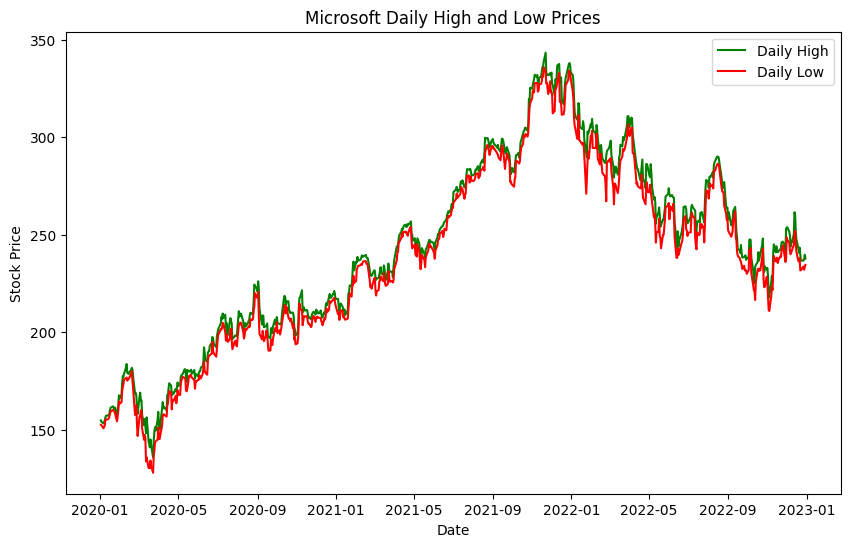

In [11]:
#Is there a relationship between the daily maximum and minimum prices for the company?

# Filter from 2020-2022
filtered_df = df_Msft[(df_Msft.index >= '2020-01-01') & (df_Msft.index <= '2022-12-31')]

# Extract relevant columns
daily_high = filtered_df['High']
daily_low = filtered_df['Low']

# Create a scatter plot or line plot
plt.figure(figsize=(10, 6))
plt.plot(daily_high, label='Daily High', color='green')
plt.plot(daily_low, label='Daily Low', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Microsoft Daily High and Low Prices')
plt.legend()

# Show the plot
plt.show()

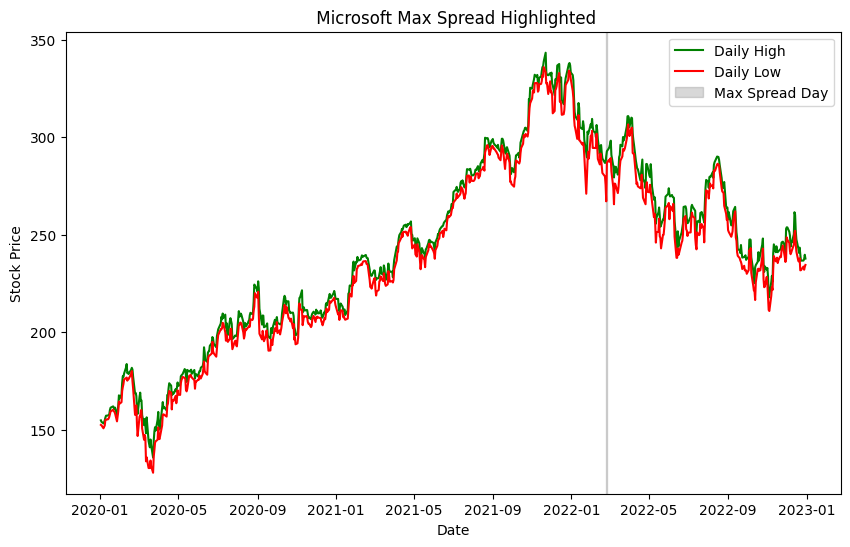

In [12]:

# Calculate daily spreads (High - Low)
daily_spreads = daily_high - daily_low

# Identify the day with the maximum spread
max_spread_day = daily_spreads.idxmax()
max_spread_value = daily_spreads.max()

# Create a scatter plot or line plot
plt.figure(figsize=(10, 6))
plt.plot(daily_high, label='Daily High', color='green')
plt.plot(daily_low, label='Daily Low', color='red')

# Highlight the day with the maximum spread
plt.axvspan(max_spread_day, max_spread_day + pd.Timedelta(days=1), color='grey', alpha=0.3, label='Max Spread Day')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f' Microsoft Max Spread Highlighted')
plt.legend()

# Show the plot
plt.show()

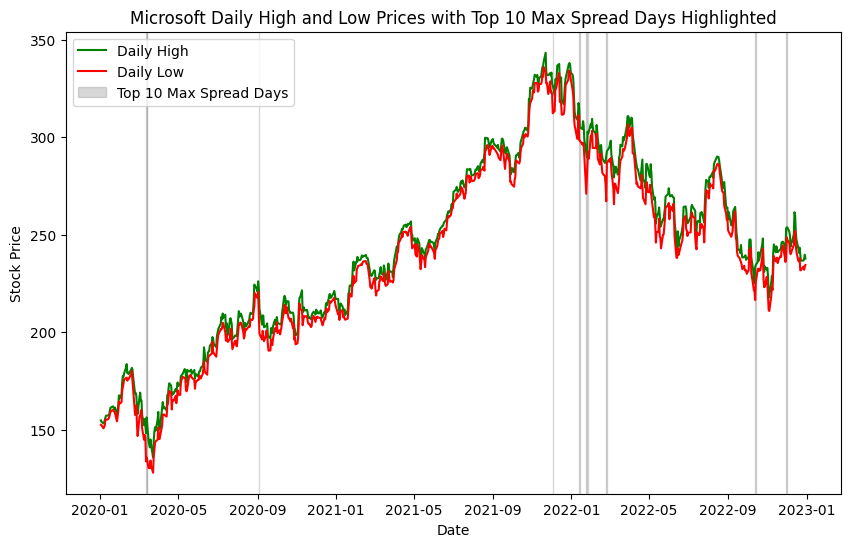

Top 10 days with the maximum spreads:
Date
2022-02-24    23.262720
2022-01-24    20.681120
2020-03-13    20.465607
2022-10-13    16.773583
2022-01-13    16.576326
2022-11-30    15.334035
2022-01-26    15.191687
2021-12-03    14.406092
2020-03-12    14.387757
2020-09-03    13.938194
dtype: float64


In [13]:
# Identify the top 10 days with the maximum spread
top_spreads = daily_spreads.nlargest(10)

# Create a scatter plot or line plot
plt.figure(figsize=(10, 6))
plt.plot(daily_high, label='Daily High', color='green')
plt.plot(daily_low, label='Daily Low', color='red')

# Highlight the top 10 days with the maximum spread using grey background bars
for date in top_spreads.index:
    plt.axvspan(date, date + pd.Timedelta(days=1), color='grey', alpha=0.3)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Microsoft Daily High and Low Prices with Top 10 Max Spread Days Highlighted')
plt.legend(["Daily High", "Daily Low", 'Top 10 Max Spread Days'], loc="upper left")

# Show the plot
plt.show()

# Print information about the top 10 days with the maximum spread
print("Top 10 days with the maximum spreads:")
print(top_spreads)

The spread is the difference between the highest and lowest prices of a stock on a given day. The spread can be influenced by a variety of factors, including news about the company, market trends, and investor sentiment.  

E.g.
2020-03-12 COVID19 crash

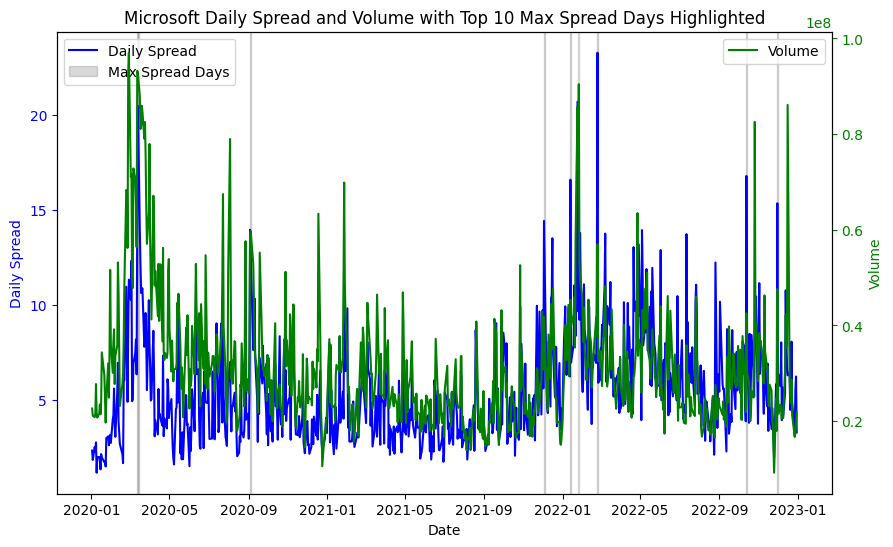

In [14]:
#Do large differences in the daily maximum and minimum prices coincide with higher or lower trading volumes?

daily_volume = filtered_df['Volume']

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot daily spreads on the first y-axis
ax1.plot(daily_spreads, label='Daily Spread', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Spread', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for volume
ax2 = ax1.twinx()
ax2.plot(daily_volume, label='Volume', color='green')
ax2.set_ylabel('Volume', color='green')
ax2.tick_params('y', colors='green')

# Highlight the top 10 days with the maximum spread using grey background bars
top_spreads = daily_spreads.nlargest(10)
for date in top_spreads.index:
    ax1.axvspan(date, date + pd.Timedelta(days=1), color='grey', alpha=0.3)

# Add labels and title
plt.title(f'Microsoft Daily Spread and Volume with Top 10 Max Spread Days Highlighted')
ax1.legend(['Daily Spread',"Max Spread Days"],loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

The visual representation indicates a correlation between days with large differences in daily maximum and minimum prices (spread) and elevated trading volumes. The simultaneous occurrence of high spreads and increased trading volumes suggests heightened market activity and interest during those specific days.

Date
2022-01-31          NaN
2022-02-28    -3.721215
2022-03-31     3.186199
2022-04-30    -9.986719
2022-05-31    -1.807728
2022-06-30    -5.532050
2022-07-31     9.309660
2022-08-31    -6.666310
2022-09-30   -10.926675
2022-10-31    -0.330610
2022-11-30    10.222295
2022-12-31    -6.004539
Freq: M, Name: Close, dtype: float64
Date
1     1.377283
2     1.453016
3     1.245476
4     1.233139
5     1.294751
6     1.355643
7     1.325538
8     1.377953
9     1.436435
10    1.207719
11    1.308262
12    1.326666
Name: Close, dtype: float64


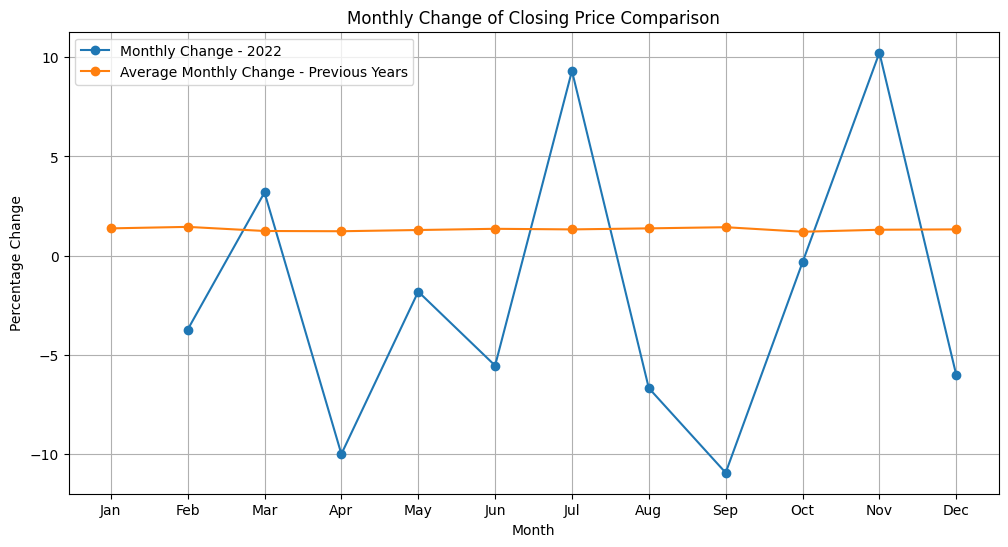

In [49]:
# Do the patterns in the most recent year match previous years?


# Calculate the monthly change for the most recent year (2022)
recent_year_data = df_Msft[(df_Msft.index.year == 2022)]
monthly_change_recent = recent_year_data['Close'].resample('M').ffill().pct_change()*100
print(monthly_change_recent)

# Calculate the average monthly change for previous years
previous_years_data = df_Msft[(df_Msft.index.year >= 2014) & (df_Msft.index.year < 2021)]
average_monthly_change_previous = previous_years_data.groupby(previous_years_data.index.month)['Close'].pct_change().groupby(previous_years_data.index.month).mean()*100
print(average_monthly_change_previous)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(monthly_change_recent.index.month, monthly_change_recent, label='Monthly Change - 2022', marker='o')
plt.plot(average_monthly_change_previous.index, average_monthly_change_previous, label='Average Monthly Change - Previous Years', marker='o')

# Convert numeric month labels to abbreviated month names
month_names = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(monthly_avg.index, month_names)

plt.title('Monthly Change of Closing Price Comparison')
plt.xlabel('Month')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()